In [2]:
import pandas as pd
import numpy as np

In [13]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [16]:
df = pd.read_csv('BTCUSD_1hr.csv', sep=',')

df.head() 

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811


In [17]:
df.describe()


,Unix Timestamp,Open,High,Low,Close,Volume
count,3.946500e+04,39465.000000,39465.000000,39465.000000,39465.000000,39465.000000
mean,6.182322e+11,4817.778638,4844.889457,4788.678433,4817.963371,158.393961
std,7.614885e+11,3925.257801,3954.058698,3893.325248,3925.202322,300.774291
min,1.444309e+09,0.000000,243.600000,0.000000,243.600000,0.000000
25%,1.479827e+09,741.740000,743.000000,740.020000,741.800000,18.164575
50%,1.515344e+09,4142.120000,4165.380000,4118.390000,4142.590000,62.790643
75%,1.550862e+12,7908.480000,7950.000000,7860.750000,7908.480000,175.504078
max,1.586390e+12,19869.860000,19999.000000,19778.120000,19869.860000,8526.751048


In [18]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Mes']= df.Date.dt.month
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Mes
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915,4
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293,4
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108,4
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553,4
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811,4


In [19]:
df.groupby('Mes')[['Open','High','Low','Close','Volume']].mean()

,Open,High,Low,Close,Volume
Mes,,,,,
1,5235.455250,5272.549905,5195.977861,5234.947318,139.061508
2,4832.780455,4861.648758,4801.810748,4832.796068,142.184108
3,4285.908084,4313.611925,4255.097919,4284.482791,162.838174
4,3892.424159,3910.033452,3875.407674,3893.959222,134.795994
5,4505.732006,4529.266975,4480.895655,4506.576075,180.035423
6,4850.064049,4875.857771,4819.498139,4850.560615,175.733343
7,5231.004049,5260.415482,5199.455973,5231.356697,210.209390
8,5429.627658,5453.530548,5403.822108,5429.836529,171.747448
9,5270.428455,5290.118993,5247.742782,5269.698097,159.681779


Text(0, 0.5, 'Valor')

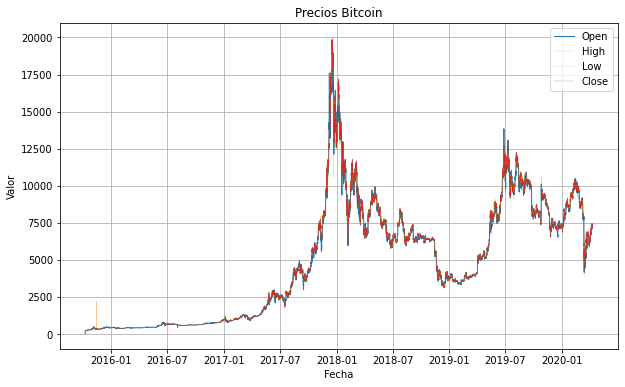

In [20]:
df['Date']=pd.to_datetime(df['Date'])
df.head()
import matplotlib.pyplot as plt
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(df.Date, df.Open, label='Open',linewidth=1)
ax.plot(df.Date, df.High, label='High',linewidth=0.3,linestyle='--')
ax.plot(df.Date, df.Low, label='Low',linewidth=0.3,linestyle=':')
ax.plot(df.Date, df.Close, label='Close',linewidth=0.3,linestyle='dashdot')

ax.legend()
ax.grid()
ax.set_title('Precios Bitcoin')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

In [21]:
fig.savefig("btc.pdf")
